In [61]:
from pathlib import Path
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import random

In [86]:
imagePath = Path("train-jpg")
csvPath = Path("trainMapping.csv")

trainDf = pd.read_csv(csvPath)

trainDf.head()


,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [63]:
selectiveLogging = trainDf[trainDf["tags"].str.contains("primary")]
selectiveLogging = selectiveLogging.reset_index(drop=True)

selectiveLogging.head()
selectiveLoggingVals = selectiveLogging["image_name"]


C:\Users\Amean\AppData\Local\Temp\ipykernel_7532\273180172.py:14: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(wspace=0, hspace=0.03)


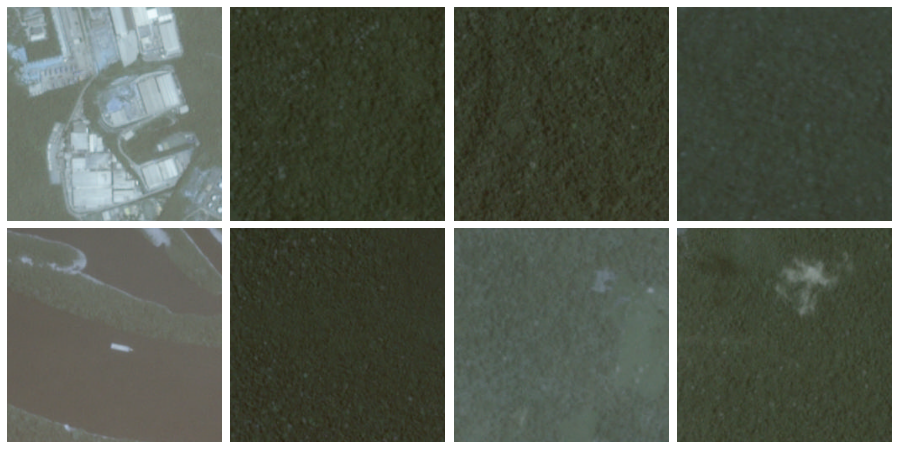

In [64]:
samples = random.choices(selectiveLoggingVals, k=8)
# samples = selectiveLoggingVals[:8]
images = [cv2.imread(str(imagePath / sample) +".jpg") for sample in samples]
w = 10
h = 10
fig = plt.figure(figsize=(16, 8), constrained_layout = True)
columns = 4
rows = 2
for i, img in enumerate(images):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(img)
# plt.subplot_tool()
fig.subplots_adjust(wspace=0, hspace=0.03)
plt.show()

In [102]:
df = trainDf.copy()
df.insert(2, "Binary Tag", value="1")
df.head()

filterList = ["conventional_mine", "artisinal_mine", "slash_burn", "bare_ground", "habitation", "agriculture"]

removeList = ["blow_down", "cloudy", "haze"]

for idx, row in df.iterrows():
    if any(item in row["tags"] for item  in filterList):
        row["Binary Tag"] = "0"
    if any(item in row["tags"] for item  in removeList):
        row["Binary Tag"] = "Null"
        
df.head()


,image_name,tags,Binary Tag
0,train_0,haze primary,Null
1,train_1,agriculture clear primary water,0
2,train_2,clear primary,1
3,train_3,clear primary,1
4,train_4,agriculture clear habitation primary road,0


In [105]:

df.filter(items=["0", "1"], axis=1)
filterDf = df.loc[df["Binary Tag"].isin(["0","1"])]
filterDf['Binary Tag'] = filterDf['Binary Tag'].astype(float)
filterDf.head()


C:\Users\Amean\AppData\Local\Temp\ipykernel_7532\3895615221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterDf['Binary Tag'] = filterDf['Binary Tag'].astype(float)


,image_name,tags,Binary Tag
1,train_1,agriculture clear primary water,0.0
2,train_2,clear primary,1.0
3,train_3,clear primary,1.0
4,train_4,agriculture clear habitation primary road,0.0
6,train_6,agriculture clear cultivation primary water,0.0


In [106]:
groupedDf = filterDf.groupby("Binary Tag").size()
groupedDf.head()

Binary Tag
0.0    10687
1.0    17660
dtype: int64

In [107]:
filterDf.to_csv("processedLabels.csv")